In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# df = pd.read_csv('../../result/radius0.1/same_period_maxlength/type20_radius0.1_period0.9_maxlength1.9.csv')

In [453]:
df = pd.read_csv('../../result/type20_radius0.1_interval0.7_maxlength1.7_epsilon0.1.csv')

In [454]:
df.size

219604

In [455]:
df.head()

,Time,sphere_pos_0_x,sphere_pos_0_y,sphere_pos_0_z,sphere_pos_1_x,sphere_pos_1_y,sphere_pos_1_z,sphere_pos_2_x,sphere_pos_2_y,sphere_pos_2_z,...,arm_energy_consumption_0,arm_force_1,input_action_1,arm_energy_consumption_1,arm_force_2,input_action_2,arm_energy_consumption_2,arm_length_0,arm_length_1,arm_length_2
0,0.0,0.577000,0.000000,0,-0.289000,0.500000,0,-0.289000,-0.500000,0,...,0.000000,0.000000,-1,0.000000,0.000000,-1,0.000000,1.00000,1.000000,1.000000
1,0.1,0.616204,0.032426,0,-0.277923,0.480230,0,-0.336697,-0.517057,0,...,0.120956,-0.256027,-1,0.000000,-0.255118,-1,0.001416,1.09898,0.999996,0.999017
2,0.2,0.654168,0.066299,0,-0.264788,0.458153,0,-0.385088,-0.533614,0,...,0.122971,-0.306815,-1,0.001462,-0.306832,-1,0.000000,1.19898,0.999014,0.999036
3,0.3,0.691751,0.101206,0,-0.250461,0.433332,0,-0.434111,-0.548700,0,...,0.126088,-0.371322,-1,0.000000,-0.371335,-1,0.000000,1.29898,0.999035,0.999057
4,0.4,0.728423,0.137691,0,-0.234177,0.405121,0,-0.484046,-0.562209,0,...,0.131357,-0.456207,-1,0.000000,-0.456219,-1,0.000000,1.39898,0.999058,0.999080


In [456]:
df.columns

Index(['Time', 'sphere_pos_0_x', 'sphere_pos_0_y', 'sphere_pos_0_z',
       'sphere_pos_1_x', 'sphere_pos_1_y', 'sphere_pos_1_z', 'sphere_pos_2_x',
       'sphere_pos_2_y', 'sphere_pos_2_z', 'arm_force_0', 'input_action_0',
       'arm_energy_consumption_0', 'arm_force_1', 'input_action_1',
       'arm_energy_consumption_1', 'arm_force_2', 'input_action_2',
       'arm_energy_consumption_2', 'arm_length_0', 'arm_length_1',
       'arm_length_2'],
      dtype='object')

In [457]:
# df_arm_vel = df[['arm_extensile_velocity_0', 'arm_extensile_velocity_1', 'arm_extensile_velocity_2']]
df_arm_vel = df[['input_action_0', 'input_action_1', 'input_action_2', ]]
# df_arm_vel = df[['arm_length_0', 'arm_length_1', 'arm_length_2', ]]

In [458]:
df_arm_vel.shape

(9982, 3)

In [459]:
arm_vels = df_arm_vel[::].values

In [460]:
# np.savetxt(fname='../../optimal_action_pattern/radius0.1/type_20/009_long.csv', X=arm_vels, delimiter=',', fmt='%.3f')

<IPython.core.display.Javascript object>


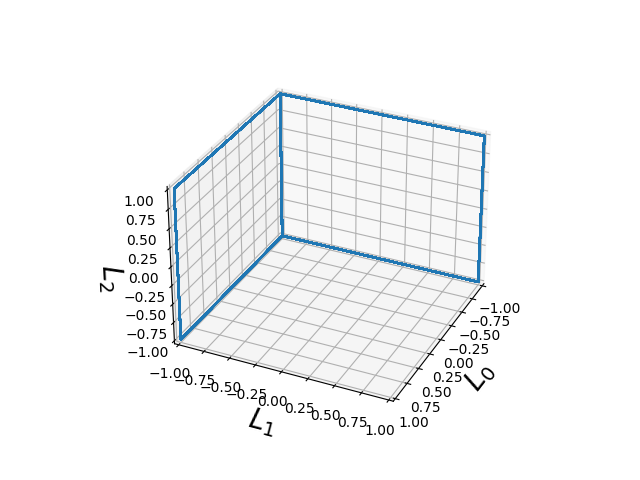

In [461]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$L_0$', fontsize=20)
ax.set_ylabel(r'$L_1$', fontsize=20)
ax.set_zlabel(r'$L_2$', fontsize=20)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=25)

data = arm_vels.T
ax.plot(data[0], data[1], data[2])

In [452]:
"""
round to -1 ~ 1
"""
def clipOne(array2d):
    clipped = []
    for array1d in array2d:
        tmp = [1.0 if item >= 0.0 else -1.0 for item in array1d]
        clipped.append(tmp)
    return np.array(clipped)

In [348]:
"""
Extract force sequence
"""
def getSeq(series_data):
    return_seq = []
    for i, data in enumerate(series_data):
        if i == 0:
            return_seq.append(data)
        else:
            if any(data != return_seq[-1]):
                return_seq.append(data)
    return np.array(return_seq)

In [349]:
"""
count each force tuples in series
"""
def countEachTuple(series_data):
    types = {}
    for i, one_data in enumerate(series_data[:-1]):
        if tuple(one_data) not in types:
            types[tuple(one_data)] = {
                'count': 1,
                'next': set()
            }
            types[tuple(one_data)]['next'].add(tuple(series_data[i+1]))
        else:
            types[tuple(one_data)]['count'] += 1
            if tuple(series_data[i+1]) not in types[tuple(one_data)]['next']:
                types[tuple(one_data)]['next'].add(tuple(series_data[i+1]))
    
    return types

In [350]:
"""
count each force tuples in series
"""
def countEachTuple2(series_data):
    types = {}
    for i, one_data in enumerate(series_data[:-1]):
        if tuple(one_data) not in types:
            types[tuple(one_data)] = {
                'count': 1,
                'next': dict()
            }
            types[tuple(one_data)]['next'][tuple(series_data[i+1])] = 1
        else:
            types[tuple(one_data)]['count'] += 1
            if tuple(series_data[i+1]) not in types[tuple(one_data)]['next']:
                types[tuple(one_data)]['next'][tuple(series_data[i+1])] = 1
            else:
                types[tuple(one_data)]['next'][tuple(series_data[i+1])] += 1
    
    return types

In [358]:
# clipped_arm_vels = clipOne(arm_vels)
# clipped_arm_vels = arm_vels.copy()
clipped_arm_vels = np.round(arm_vels, 0)
clipped_arm_vels.shape

(10000, 3)

In [359]:
arm_vels_seq = getSeq(clipped_arm_vels)
arm_vels_seq.shape

(25, 3)

In [360]:
type_set = countEachTuple(arm_vels_seq)
type_set

{(0.0, -1.0, -1.0): {'count': 4,
  'next': {(1.0, -1.0, -1.0), (1.0, -1.0, 0.0)}},
 (1.0, -1.0, -1.0): {'count': 3, 'next': {(1.0, -1.0, 0.0)}},
 (1.0, -1.0, 0.0): {'count': 4, 'next': {(1.0, -1.0, 1.0)}},
 (1.0, -1.0, 1.0): {'count': 4,
  'next': {(-1.0, -1.0, 1.0), (-0.0, -1.0, 1.0)}},
 (-0.0, -1.0, 1.0): {'count': 2, 'next': {(-1.0, -1.0, -1.0)}},
 (-1.0, -1.0, -1.0): {'count': 4,
  'next': {(-1.0, 0.0, -1.0), (0.0, -1.0, -1.0)}},
 (-1.0, -1.0, 1.0): {'count': 2, 'next': {(-1.0, -1.0, -1.0)}},
 (-1.0, 0.0, -1.0): {'count': 1, 'next': {(-1.0, 1.0, -1.0)}}}

In [361]:
type_set2 = countEachTuple2(arm_vels_seq)
type_set2

{(0.0, -1.0, -1.0): {'count': 4,
  'next': {(1.0, -1.0, -1.0): 3, (1.0, -1.0, 0.0): 1}},
 (1.0, -1.0, -1.0): {'count': 3, 'next': {(1.0, -1.0, 0.0): 3}},
 (1.0, -1.0, 0.0): {'count': 4, 'next': {(1.0, -1.0, 1.0): 4}},
 (1.0, -1.0, 1.0): {'count': 4,
  'next': {(-0.0, -1.0, 1.0): 2, (-1.0, -1.0, 1.0): 2}},
 (-0.0, -1.0, 1.0): {'count': 2, 'next': {(-1.0, -1.0, -1.0): 2}},
 (-1.0, -1.0, -1.0): {'count': 4,
  'next': {(0.0, -1.0, -1.0): 3, (-1.0, 0.0, -1.0): 1}},
 (-1.0, -1.0, 1.0): {'count': 2, 'next': {(-1.0, -1.0, -1.0): 2}},
 (-1.0, 0.0, -1.0): {'count': 1, 'next': {(-1.0, 1.0, -1.0): 1}}}

In [325]:
tmp_set = type_set2.copy()
tmp_set[(1.0, 1.0, -1.0)] = {'count': 228, 'next': {(-1.0, 1.0, -1.0): 228}}
tmp_set[(-1.0, 1.0, -1.0)] = {'count': 200, 'next': {(-1.0, -1.0, -1.0): 200}}
tmp_set[(-1.0, 1.0, 1.0)] = {'count': 114, 'next': {(1.0, 1.0, -1.0): 114}}
tmp_set[(1.0, -1.0, -1.0)] = {'count': 116, 'next': {(1.0, 1.0, -1.0): 116}}
tmp_set[(-1.0, -1.0, -1.0)] = {'count': 227, 'next': {(1.0, -1.0, -1.0): 115, (1.0, -1.0, 1.0): 112}}
tmp_set[(1.0, -1.0, 1.0)] = {'count': 112, 'next': {(-1.0, -1.0, 1.0): 112}}
tmp_set[(-1.0, -1.0, 1.0)] = {'count': 112, 'next': {(-1.0, 1.0, 1.0): 112}}
tmp_set

{(1.0, 1.0, -1.0): {'count': 228, 'next': {(-1.0, 1.0, -1.0): 228}},
 (-1.0, 1.0, -1.0): {'count': 200, 'next': {(-1.0, -1.0, -1.0): 200}},
 (-1.0, 1.0, 1.0): {'count': 114, 'next': {(1.0, 1.0, -1.0): 114}},
 (1.0, -1.0, -1.0): {'count': 116, 'next': {(1.0, 1.0, -1.0): 116}},
 (-1.0, -1.0, -1.0): {'count': 227,
  'next': {(1.0, -1.0, -1.0): 115, (1.0, -1.0, 1.0): 112}},
 (1.0, -1.0, 1.0): {'count': 112, 'next': {(-1.0, -1.0, 1.0): 112}},
 (-1.0, -1.0, 1.0): {'count': 112, 'next': {(-1.0, 1.0, 1.0): 112}}}

<IPython.core.display.Javascript object>


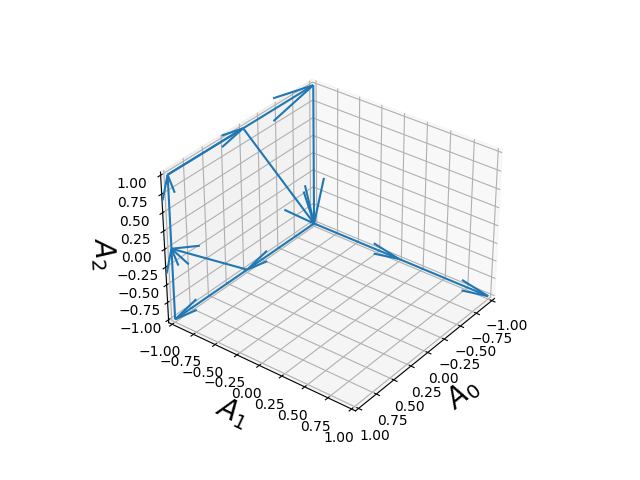

In [362]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$A_0$', fontsize=20)
ax.set_ylabel(r'$A_1$', fontsize=20)
ax.set_zlabel(r'$A_2$', fontsize=20)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=25)

for origin, next_ in type_set2.items():
# for origin, next_ in tmp_set.items():
    if next_['count'] < 0:
        continue
    target_list = next_['next']
    for target, count in target_list.items():
        if count < 0:
            continue
        ax.quiver(origin[0], origin[1], origin[2], (target[0]-origin[0]), (target[1]-origin[1]), (target[2]-origin[2]), )

In [328]:
arm_vels_seq[:16]

array([[-1, -1, -1]])

In [41]:
tmp_set

{(-1.0, -1.0, -1.0): {'count': 227,
  'next': {(1.0, -1.0, -1.0): 115, (1.0, -1.0, 1.0): 112}},
 (1.0, -1.0, 1.0): {'count': 112, 'next': {(-1.0, -1.0, 1.0): 112}},
 (-1.0, -1.0, 1.0): {'count': 112, 'next': {(-1.0, 1.0, 1.0): 112}},
 (-1.0, 1.0, 1.0): {'count': 114, 'next': {(1.0, 1.0, -1.0): 114}},
 (0.3, 1.0, -1.0): {'count': 6, 'next': {(-1.0, -1.0, -1.0): 6}},
 (1.0, -1.0, -1.0): {'count': 116, 'next': {(1.0, 1.0, -1.0): 116}},
 (1.0, 1.0, -1.0): {'count': 228, 'next': {(-1.0, 1.0, -1.0): 228}},
 (-1.0, 1.0, -1.0): {'count': 200, 'next': {(-1.0, -1.0, -1.0): 200}},
 (0.9, 1.0, -1.0): {'count': 11, 'next': {(-1.0, 1.0, -1.0): 11}},
 (0.5, 1.0, -1.0): {'count': 5, 'next': {(-1.0, -1.0, -1.0): 5}},
 (0.4, 1.0, -1.0): {'count': 18, 'next': {(-1.0, -1.0, -1.0): 18}}}

In [22]:
output = np.array([
    [-1.0, -1.0, -1.0],
    [ 1.0, -1.0, -1.0],
    [ 1.0,  1.0, -1.0],
    [-1.0,  1.0, -1.0],
    [-1.0, -1.0, -1.0],
    [ 1.0, -1.0,  1.0],
    [-1.0, -1.0,  1.0],
    [-1.0,  1.0,  1.0],
    [ 1.0,  1.0, -1.0],
    [-1.0,  1.0, -1.0],
])

In [23]:
countEachTuple2(output)

{(-1.0, -1.0, -1.0): {'count': 2,
  'next': {(1.0, -1.0, -1.0): 1, (1.0, -1.0, 1.0): 1}},
 (1.0, -1.0, -1.0): {'count': 1, 'next': {(1.0, 1.0, -1.0): 1}},
 (1.0, 1.0, -1.0): {'count': 2, 'next': {(-1.0, 1.0, -1.0): 2}},
 (-1.0, 1.0, -1.0): {'count': 1, 'next': {(-1.0, -1.0, -1.0): 1}},
 (1.0, -1.0, 1.0): {'count': 1, 'next': {(-1.0, -1.0, 1.0): 1}},
 (-1.0, -1.0, 1.0): {'count': 1, 'next': {(-1.0, 1.0, 1.0): 1}},
 (-1.0, 1.0, 1.0): {'count': 1, 'next': {(1.0, 1.0, -1.0): 1}}}

In [48]:
np.savetxt(fname='../../optimal_action_pattern/radius0.1/009_long.csv', X=arm_vels_seq, delimiter=',', fmt='%.3f')

In [25]:
"""
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=25)

data = force_seq.T
ax.plot(data[0], data[1], data[2])
"""

"\n%matplotlib notebook\n\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nax.set_xlim(-1, 1)\nax.set_ylim(-1, 1)\nax.set_zlim(-1, 1)\nax.view_init(elev=30, azim=25)\n\ndata = force_seq.T\nax.plot(data[0], data[1], data[2])\n"

In [22]:
tmp = np.loadtxt('../../optimal_action_pattern/radius0.1/009_long.csv', delimiter=',')

In [21]:
countEachTuple2(tmp)

NameError: name 'countEachTuple2' is not defined